# 主成分分析（PCA）
参考：https://zhuanlan.zhihu.com/p/37777074
## 作用
把原来的多个变量划为少数几个综合指标的一种统计分析方法，本质上是把数据集进行降维，保留下**最重要**的特征，去除噪声和不重要的特征，从而实现提升数据处理速度的目的，降维有以下几个优点：
1. 数据集更易使用
2. 降低算法的计算开销
3. 去除噪声
4. 使得结果更易理解

降维的算法有很多，比如奇异值分解(SVD)、主成分分析(PCA)、因子分析(FA)、独立成分分析(ICA)

## 数学原理
具体见上面链接

简单的来说，PCA工作就是从原始的空间中顺序地寻找一组相互正交的坐标轴，新的坐标轴的选择与数据本身是密切相关的，第一个新坐标轴就是原始数据中方差最大的方向。这个工作可以通过计算数据矩阵的协方差矩阵来做到，因为可以对这个协方差矩阵进行特征值分解或SVD分解。

以**特征值分解**为例，假设有一个矩阵**A**有一组特征向量**v**，将这组特征向量单位化正交化，能得到一组正交单位向量，特征值分解将**A**分解为如下式：

$$A=Q\Sigma Q^{-1}$$

然后我们选择最大的k个特征值，将其对应的k个特征向量组成行向量矩阵P，将数据转换到这k个特征向量对应的新空间中，即
$$Y=Px$$

另外，还有一种SVD（奇异值分解）的方式，sklearn里PCA算法就是这样实现的，因此结果的*符号*上可能会有所不同，具体看原文

## 解释
通俗的一种解释是最大方差理论，具体可以看上面的链接的第五个标题

## 两种实现
下面分别给出python源代码和基于sklearn库的一种实现

In [1]:
## python代码的实现
import numpy as np
def pca(X,k):#k is the components you want
  #mean of each feature
  n_samples, n_features = X.shape
  mean=np.array([np.mean(X[:,i]) for i in range(n_features)])
  #normalization
  norm_X=X-mean
  #scatter matrix
  scatter_matrix=np.dot(np.transpose(norm_X),norm_X)
  #Calculate the eigenvectors and eigenvalues
  eig_val, eig_vec = np.linalg.eig(scatter_matrix)
  eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]
  # sort eig_vec based on eig_val from highest to lowest
  eig_pairs.sort(reverse=True)
  # select the top k eig_vec
  feature=np.array([ele[1] for ele in eig_pairs[:k]])
  #get new data
  data=np.dot(norm_X,np.transpose(feature))
  return data

X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

print(pca(X,1))

[[-0.50917706]
 [-2.40151069]
 [-3.7751606 ]
 [ 1.20075534]
 [ 2.05572155]
 [ 3.42937146]]


In [2]:
## sklearn库的实现
from sklearn.decomposition import PCA
import numpy as np 
X = np.array([[-1,1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
pca = PCA(n_components=1)
pca.fit(X)
print(pca.transform(X))

pca.explained_variance_

[[ 0.50917706]
 [ 2.40151069]
 [ 3.7751606 ]
 [-1.20075534]
 [-2.05572155]
 [-3.42937146]]


array([7.5413491])

这两个结果虽然正负号有不同，但是效果是一样的，因为sklearn在SVD分解中的一个操作中对两边的矩阵同时取反了（不影响结果，可以理解为把坐标轴反向了）

# 更进一步——关于PCA的参数
原文链接：https://blog.csdn.net/qq_46033892/article/details/126308735

`sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)`

- **n_components**:int or float，如果是整数则代表将数据降为几维，如果0和1之间的浮点数，则代表满足最低主成分方差的贡献率，比如n_components=0.99，则返回满足主成分方差贡献率达99%的主成分，为None则返回所有主成分，为'mle'则自动选取主成分个数并返回贡献率
- **copy**:bool，影响降维后调用方式，copy=True则直接fit_transform(X)显示降维后数据，如果copy=False则fit(X).transform(X)显示降维后数据
- **whiten**:是否数据白化

还有一些无关紧要的参数，比如奇异值分解SVD的方法

部分属性：
- components_：最大方差的主成分
- explained_variance_：降维后各主成分的方差值，越大说明越重要
- explained_variance_ratio_：方差值的占比
- singular_values_：所选主成分的奇异值
- mean_：各特征的经验平均值，由训练集估计
- n_features_：训练集特征数
- n_samples_：训练集样本数
- noise_variance_：噪声协方差

In [3]:
import os
for dirname, _, filenames in os.walk('.\datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# 任何在这个工程文件夹的datasets子文件夹中的文件将被输出

print('-'*50)

#忽略警告
import warnings
warnings.filterwarnings('ignore')

.\datasets\PcaData.csv
--------------------------------------------------


部分数据：

32.502345269453031,31.70700584656992

53.426804033275019,68.77759598163891

61.530358025636438,62.562382297945803

47.475639634786098,71.546632233567777

59.813207869512318,87.230925133687393

55.142188413943821,78.211518270799232

[365.60767537  23.39589256]
[[-45.44636224  -2.12421962]
 [ -3.18976663   3.01793508]
 [ -5.83002685  12.88330352]
 [ -2.90942304  -3.5399096 ]
 [ 16.30276875   1.85493242]
 [  6.18233572   0.99182282]
 [  6.38224294  -2.26293272]
 [-17.47162688  -6.35674292]
 [  0.82789634  -4.40701062]
 [ -1.1942246    1.24211593]
 [-18.82988128   0.83061242]
 [  9.82212111  -1.37186701]
 [-12.98836277  -2.9487278 ]
 [  4.73664837   4.86650324]
 [  9.76812424   1.22188719]
 [-12.34171166   1.9701759 ]
 [  6.50517651 -10.45869071]
 [ 25.86419811  -1.58237277]
 [-24.59111666   3.43281858]
 [-19.77596879  -5.92458772]
 [ 15.64636137   9.02909363]
 [ 47.41949559  -4.97215301]
 [-16.11355905   1.93663085]
 [-23.78777016  -1.27626147]
 [  2.30509842  -0.97058785]
 [  4.61731581   6.21739986]
 [ 22.94252066  -3.60547094]
 [ 25.14749668   2.3063033 ]]
[[ 0.38275392  0.92385033]
 [ 0.92385033 -0.38275392]]


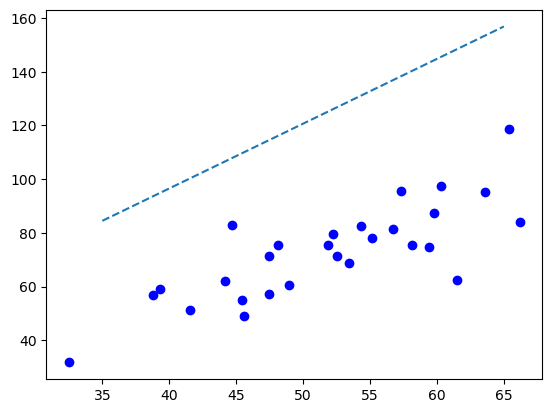

In [4]:
# 用sklearn的PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
data = np.genfromtxt(r".\datasets\PcaData.csv",delimiter=",")

# pca = PCA(n_components=2,whiten=True)   whiten=True标准化
pca=PCA(n_components=2)
pca.fit(data)
main_var = pca.explained_variance_  # 特征值
print(main_var)
pca_data = pca.transform(data)
print(pca_data)

x_range = np.linspace(35,65,100)

print(pca.components_)

y_range = x_range * (pca.components_[1][0]/pca.components_[0][0])
plt.plot(x_range, y_range, '--')
plt.scatter(data[:,0],data[:,1],c="b")
plt.show()

In [5]:
pca.singular_values_

array([99.35495576, 25.13342593])

# 再进一步，和K-means结合
原文链接：https://www.kaggle.com/code/asindico/customer-segments-with-pca

## 1.导入和预处理
本文使用的数据集比较大，为了仓库的精简外置了，下载链接如下：

https://www.kaggle.com/competitions/instacart-market-basket-analysis/data

In [6]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('D:\datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# 任何在这个工程文件夹的datasets子文件夹中的文件将被输出

print('-'*50)

#忽略警告
import warnings
warnings.filterwarnings('ignore')

--------------------------------------------------


In [7]:
orders = pd.read_csv(r'D:\datasets\orders.csv')
print(orders.shape)
orders.head()

### 这个数据集展示的订单，订单由order_id标识
### order_number用来标识同一用户先后下定订单的时间，越小说明这个用户最早买的是这个订单

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\datasets\\orders.csv'

In [ ]:
prior = pd.read_csv(r'D:\datasets\order_products__prior.csv')
print(prior.shape)
prior.head()

### 每个订单由一组产品构成，每个产品都具有add_to_cart_order特征，表示他们被添加到购物车的顺序

In [ ]:
train = pd.read_csv(r'D:\datasets\order_products__train.csv')
print(train.shape)
train.head()

In [ ]:
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])
# 对两个表进行连接

order_prior = order_prior.sort_values(by=['user_id','order_id'])
# 对用户id和订单id进行排序

order_prior.head()

In [ ]:
products = pd.read_csv(r'D:\datasets\products.csv')
products.head()

In [ ]:
aisles = pd.read_csv(r'D:\datasets\aisles.csv')
aisles.head()

In [ ]:
print(aisles.shape)
print(aisles[93:94])

### 解释
接下来把数据进行整合
- 首先把先前订单和产品对应上
- 然后和购买对应订单的用户对应上
- 然后和食物存放区域（aisle）对应上，比如：一款茶的aisle_id是94，其对应的aisle是tea，也就是茶饮区域

In [ ]:
_mt = pd.merge(prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

In [ ]:
### 检查最终结果中，产品的购买总量情况
mt['product_name'].value_counts()[:]

可以看出这里的用户很喜欢吃♂香蕉

In [ ]:
len(mt['product_name'].unique())
# 商品总数

In [ ]:
print(len(mt['aisle'].unique()))
# 商品的类型总数

mt['aisle'].value_counts()[0:10]
# 最主要的10类产品，可以看出，新鲜蔬果是用户的最爱

## 2.聚类
现在希望进行聚类，那么首先要搞清楚拿什么进行聚类，拿每个人每个产品的购买情况吗？显然不行，因为总共有大概5W件产品，维度直接爆炸，其次这些产品分属于不同的类别，而现在单独把他们拿出来进行聚类显然是不合适的，因此要用aisle来进行聚类，那么首先就要筛选出每个用户的每个种类产品的购买情况

这里我们已经有一个大的df，类似一个sql数据库，保存了user_id、order_id、产品名和产品种类，现在我们想做的无非就是进行计数

这里使用到pandas的crosstab，可以节省很多时间：https://zhuanlan.zhihu.com/p/585690655

In [ ]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
# 这种方式是以user_id为index，统计aisle的频数

cust_prod.head(10)

In [ ]:
cust_prod.shape

### 主成分分析
因为对于K-means来说，高维度可能会对精度有致命的打击，因此我们需要把原来的134个特征降维，原文降到6个特征

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [ ]:
ps = pd.DataFrame(pca_samples)
ps.head()

绘图，原文这里直接给出了结论，为了分析过程的完整性，我画了一个6x6的图

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


fig = plt.figure(figsize=(16,16))
plt.title('Plot of Matrix', fontsize=25)

axes = []
for i in range(36):
    ax = fig.add_subplot(6,6,i+1)
    axes.append(ax)

for i in range(6):
    for j in range(6):
        axes[6*i+j].plot(ps[i],ps[j],'o',markersize=0.5,color='blue',alpha=0.5,label='class')
        
plt.show()

作者在此处选择了第二列和第五列（虽然没看出来是怎么选出来的）

后面作者聚类的时候就使用了这两列的数据进行聚类，这里可以理解，因为要用全部六维数据进行聚类计算的复杂度太高，跑的时间会很长，但是这里作者的选取没有给太多的理由，感觉比较偏主观

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(4,4))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

### 评估一下最佳聚类数
用之前Kmeans的yellowbrick包

In [ ]:
## 肘部法则

# yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(tocluster)
visualizer.show()
plt.show()

# 下图中表示随着k增加，失真分数降低，底层算法推荐的是k=5为最佳

In [ ]:
### 聚类

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=5,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

In [ ]:
print (c_preds[0:100])

In [ ]:
import matplotlib
fig = plt.figure(figsize=(6,6))
colors = ['orange','blue','purple','green','yellow']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored, s=4)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=4, color='red', alpha=0.9)

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

## 3.评估
可以看到虽然我们使用了5聚类，但是结果表现的并不是很好，我们认为橙色和绿色的部分共性应该是比较多的，看一下他们的数量就可以知道了

In [ ]:
## 各个聚类的数量

tocluster['cluster']=c_preds
tocluster.head()

In [ ]:
KM_clust_sizes = tocluster.groupby('cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

2、4差的有点多，还是选择了作者的四分类

In [ ]:
tocluster = pd.DataFrame(ps[[4,1]]) 
### 聚类
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

In [ ]:
fig = plt.figure(figsize=(6,6))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],s=5,color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=6, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

## 各个聚类的数量
tocluster['cluster']=c_preds
tocluster.head()

KM_clust_sizes = tocluster.groupby('cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

现在把cluster加入到用户id的表格中

In [ ]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

In [ ]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(8,8))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

### 这一步是绘制了各个聚类中各用户对不同产品的购买频数中位数，结果可以看到这四类用户偏好的产品还是有一定差异的

In [ ]:
c0.sort_values(ascending=False)[0:10]

In [ ]:
c1.sort_values(ascending=False)[0:10]

In [ ]:
c2.sort_values(ascending=False)[0:10]

In [ ]:
c3.sort_values(ascending=False)[0:10]

### baby food formula主要都给这群人买了，好家伙，宝爸宝妈是吧

In [ ]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
HTML(cluster_means.to_html())

### 观察结果
聚类0的各项购买量都很少而且很平均，我认为是偶尔逛逛超市的人

聚类1偏好新鲜水果和酸奶

聚类2相当偏好新鲜蔬菜

聚类3各项指标都比较高。根据之前的表，这类群体是baby food formula的主要购买者

### 后记
作者观察到不同聚类群体购买量排行的第10-15位表现出了不同的特征，因为这里基本上都是别的群体不买的东西，可能会反映群体的偏好，这里我用一个表展示出来

In [ ]:
c0.sort_values(ascending=False)[10:15]

In [ ]:
preference = pd.DataFrame([c0.sort_values(ascending=False)[10:15].index.to_list(),
                          c1.sort_values(ascending=False)[10:15].index.to_list(),
                          c2.sort_values(ascending=False)[10:15].index.to_list(),
                          c3.sort_values(ascending=False)[10:15].index.to_list()], columns=['top11','top12','top13','top14','top15'])
preference.head()

看表格之后的结论是，好像没啥太大联系

0.5x + 1y

x y 

z = 0.5x+0.5y

0.5x + 1y